In [4]:
from CausalModule import CausalModule
# from run_effect_estimation import run_effect_estimation
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
# data_url = "https://raw.githubusercontent.com/FenTechSolutions/CausalDiscoveryToolbox/master/cdt/data/resources/cyto_full_data.csv"
# data = pd.read_csv(data_url) 
import dowhy.datasets
dataset = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_treatments=1,
        num_samples=10000,
        treatment_is_binary=True,
        outcome_is_binary=True,
        stddev_treatment_noise=10)
data = dataset['df']
data['v0'] = data['v0'].astype(int)
data['y'] = data['y'].astype(int)
print(data.head())
print(dataset['treatment_name'])
print(dataset['outcome_name'])
discovery_algorithm = "pc" 
treatment_variable = dataset['treatment_name'][0]
outcome_variable = dataset['outcome_name'][0]
treatment_value = 1
control_value = 0

    Z0        Z1        W0        W1        W2        W3        W4  v0  y
0  1.0  0.131563 -2.016020 -0.771294 -0.018815 -2.353093  1.577151   1  1
1  0.0  0.675167  1.382007  0.708706 -1.107508 -0.145480 -1.221751   1  1
2  0.0  0.865543  2.556792 -0.593746 -0.710964 -0.311986  2.099467   0  1
3  0.0  0.546440  1.744714  0.487346 -0.858862 -2.276144 -0.500973   1  1
4  0.0  0.357177  2.329257 -0.048635  0.353071  0.042535  2.935838   0  1
['v0']
y


2025-08-14 11:10:28,150 INFO: CausalModule initialized with provided parameters.
2025-08-14 11:10:28,151 INFO: Finding causal graph using pc algorithm
Depth=5, working on node 8: 100%|██████████| 9/9 [00:00<00:00, 1141.38it/s]


['Z0', 'Z1', 'W0', 'W1', 'W2', 'W3', 'W4', 'v0', 'y']


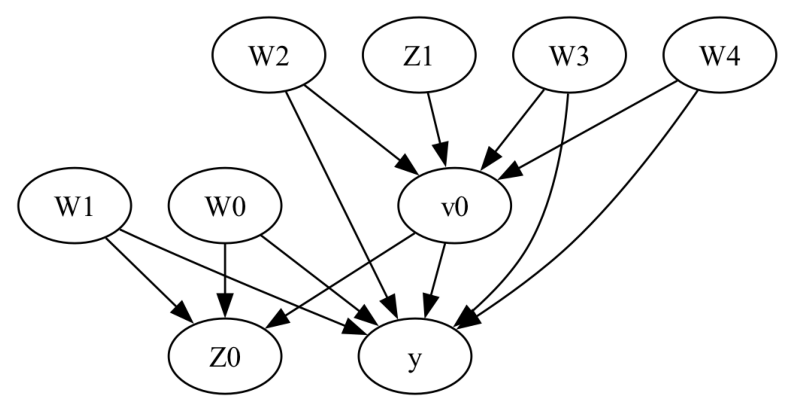

2025-08-14 11:10:28,752 INFO: Creating a causal model from the discovered/given causal graph
2025-08-14 11:10:28,754 INFO: Model to find the causal effect of treatment ['v0'] on outcome ['y']
2025-08-14 11:10:28,755 INFO: Identifying the effect estimand of the treatment on the outcome variable
2025-08-14 11:10:28,758 INFO: Causal effect can be identified.
2025-08-14 11:10:28,761 INFO: Instrumental variables for treatment and outcome:['Z1']
2025-08-14 11:10:28,762 INFO: Frontdoor variables for treatment and outcome:[]
2025-08-14 11:10:28,763 INFO: Note that you can also use other methods for the identification process. Below are method descriptions taken directly from DoWhy's documentation
2025-08-14 11:10:28,763 INFO: maximal-adjustment: returns the maximal set that satisfies the backdoor criterion. This is usually the fastest way to find a valid backdoor set, but the set may contain many superfluous variables.
2025-08-14 11:10:28,763 INFO: minimal-adjustment: returns the set with mini

In [6]:
# Initialize the CausalModule with the provided parameters
causal_module = CausalModule(
    data=data,
    treatment_variable=treatment_variable,
    outcome_variable=outcome_variable,
)

# Find the causal graph
causal_module.find_causal_graph(algo=discovery_algorithm)
print(causal_module.graph.nodes())
# Refute the causal graph
# causal_module.refute_cgm(n_perm=10)
causal_module.see_graph()

# Create a causal graph model
causal_module.create_model()
# Identify the estimand
causal_module.identify_effect()
# Estimate the effect
causal_module.estimate_effect(ctrl_val=control_value, trtm_val=treatment_value)
# Refute the estimate
causal_module.refute_estimate()

# Save results to CSV (default directory is 'outputs/results')
causal_module.store_results()

In [7]:
interventional_samples = causal_module.simulate_intervention(
    variable_to_intervene_dict={
        "v0": lambda x: 1,
        "Z0": lambda x: 0,
        "Z1": lambda x: 0.5,
        "W0": lambda x: -1,
        "W1": lambda x: 1,
        "W2": lambda x: 0.5,
        "W3": lambda x: -1,
        "W4": lambda x: -2,
        },
    num_samples_to_draw=5000
)

Fitting causal mechanism of node y: 100%|██████████| 9/9 [00:00<00:00, 19.64it/s]


In [8]:
type(interventional_samples)

pandas.core.frame.DataFrame

In [9]:
interventional_samples.head()

,Z1,W0,W1,W2,W3,W4,v0,Z0,y
0,0.5,-1,1,0.5,-1,-2,1,0,1
1,0.5,-1,1,0.5,-1,-2,1,0,1
2,0.5,-1,1,0.5,-1,-2,1,0,1
3,0.5,-1,1,0.5,-1,-2,1,0,1
4,0.5,-1,1,0.5,-1,-2,1,0,1


In [10]:
causal_module.store_results()

2025-08-14 11:11:28,548 INFO: ==========================================
2025-08-14 11:11:28,549 INFO: Number of nodes: 9
2025-08-14 11:11:28,549 INFO: ==========================================
2025-08-14 11:11:28,550 INFO: Number of edges: 13
2025-08-14 11:11:28,550 INFO: ==========================================
2025-08-14 11:11:28,550 INFO: Edge: Z1 -> v0, Weight: 1
2025-08-14 11:11:28,551 INFO: Edge: W0 -> Z0, Weight: 1
2025-08-14 11:11:28,551 INFO: Edge: W0 -> y, Weight: 1
2025-08-14 11:11:28,552 INFO: Edge: W1 -> Z0, Weight: 1
2025-08-14 11:11:28,552 INFO: Edge: W1 -> y, Weight: 1
2025-08-14 11:11:28,552 INFO: Edge: W2 -> v0, Weight: 1
2025-08-14 11:11:28,552 INFO: Edge: W2 -> y, Weight: 1
2025-08-14 11:11:28,553 INFO: Edge: W3 -> v0, Weight: 1
2025-08-14 11:11:28,553 INFO: Edge: W3 -> y, Weight: 1
2025-08-14 11:11:28,553 INFO: Edge: W4 -> v0, Weight: 1
2025-08-14 11:11:28,554 INFO: Edge: W4 -> y, Weight: 1
2025-08-14 11:11:28,554 INFO: Edge: v0 -> Z0, Weight: 1
2025-08-14 11:1

In [11]:
causal_module.results.keys()

dict_keys(['graph_properties', 'node_quality_score', 'graph_quality_score', 'graph_quality_summary', 'effect_estimate', 'estimate_refutation', 'interventional_samples'])

In [12]:
causal_module.results['interventional_samples']

,Z1,W0,W1,W2,W3,W4,v0,Z0,y
0,0.5,-1,1,0.5,-1,-2,1,0,1
1,0.5,-1,1,0.5,-1,-2,1,0,1
2,0.5,-1,1,0.5,-1,-2,1,0,1
3,0.5,-1,1,0.5,-1,-2,1,0,1
4,0.5,-1,1,0.5,-1,-2,1,0,1
...,...,...,...,...,...,...,...,...,...
4995,0.5,-1,1,0.5,-1,-2,1,0,1
4996,0.5,-1,1,0.5,-1,-2,1,0,1
4997,0.5,-1,1,0.5,-1,-2,1,0,1
4998,0.5,-1,1,0.5,-1,-2,1,0,1
